<a href="https://colab.research.google.com/github/srishti-git1110/NNs_in_PyTorch/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms

In [7]:
from torch.nn.modules.loss import NLLLoss
from torch.utils.data import DataLoader
train_set = datasets.FashionMNIST(root='./data/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.FashionMNIST(root='./data/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=64, shuffle=True)

class Clothes(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Clothes, self).__init__()
    self.fc1 = nn.Linear(input_size, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, num_classes)

  def forward(self, x):
    x = x.reshape(x.shape[0], -1)
    return F.log_softmax(self.fc4(F.relu(self.fc3(F.relu(self.fc2(F.relu(self.fc1(x))))))), dim=1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
input_size = 784
num_classes = 10
learning_rate = .001
epochs = 4

classifier = Clothes(input_size, num_classes).to(device)
criterion = NLLLoss()
optimizer = optim.Adam(classifier.parameters(), lr=learning_rate)

for epoch in range(epochs):
  for batch, (images, targets) in enumerate(train_loader):
    images, targets = images.to(device), targets.to(device)

    scores = classifier.forward(images)
    loss = criterion(scores, targets)
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

def check_accuracy(loader, model):
  if loader.dataset.train:
    print("Train accuracy")
  else:
    print('test accuracy')
  num_correct = 0
  num_samples = 0
  model.eval()
  with torch.no_grad():
    for x, y in loader:
      x, y = x.to(device), y.to(device)
      scores = model.forward(x)
      _, predictions = scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)
    print(f'Accuracy {float(num_correct)/float(num_samples)*100:.2f}')
  model.train()

check_accuracy(train_loader, classifier)
check_accuracy(test_loader, classifier)

Train accuracy
Accuracy 89.64
test accuracy
Accuracy 87.40


In [ ]:
!pip install retina
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = iter(test_loader)
images, label = dataiter.next()

--2022-04-22 11:50:24--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-04-22 11:50:26 (27.3 MB/s) - ‘helper.py’ saved [2813/2813]



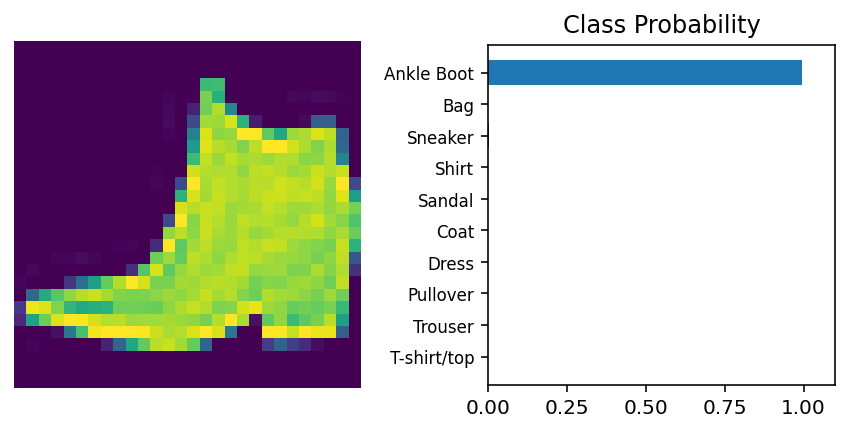

In [15]:
import helper
img = images[1]
prob = torch.exp(classifier.forward(img))

!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
import importlib
importlib.reload(helper)
helper.view_classify(img, prob, version='Fashion')

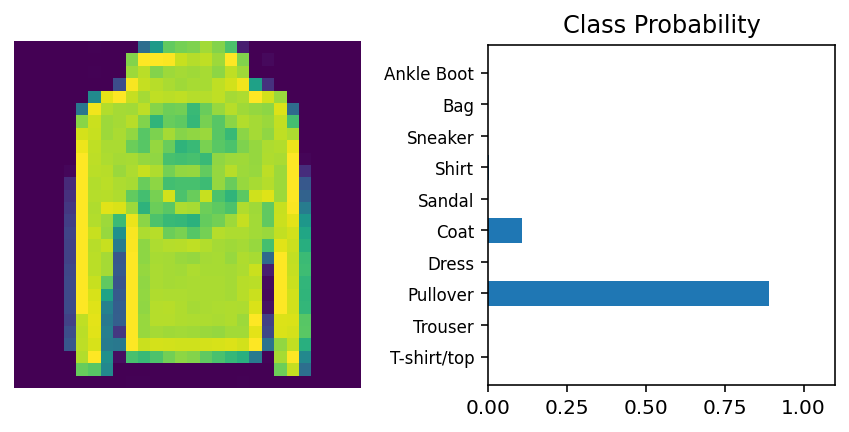

In [17]:
img = images[2]
prob = torch.exp(classifier.forward(img))
helper.view_classify(img, prob, version='Fashion')

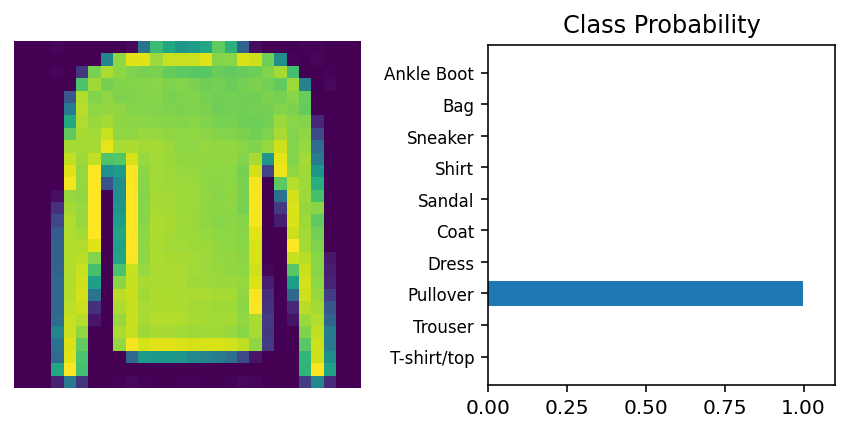

In [18]:
img = images[8]
prob = torch.exp(classifier.forward(img))
helper.view_classify(img, prob, version='Fashion')

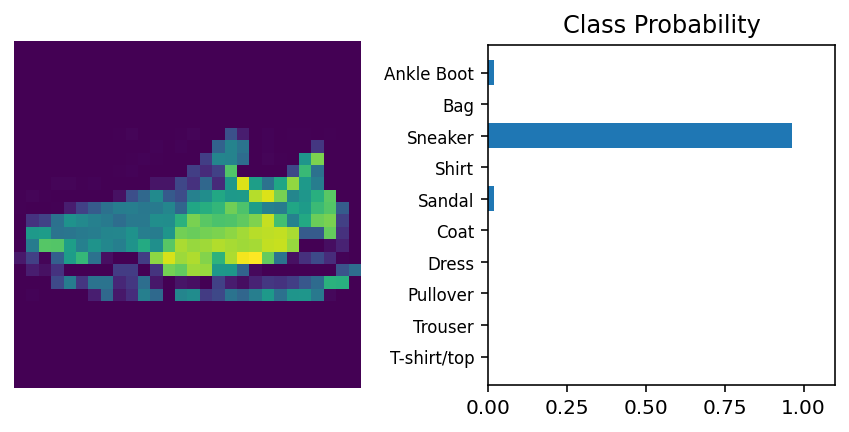

In [19]:
img = images[15]
prob = torch.exp(classifier.forward(img))
helper.view_classify(img, prob, version='Fashion')

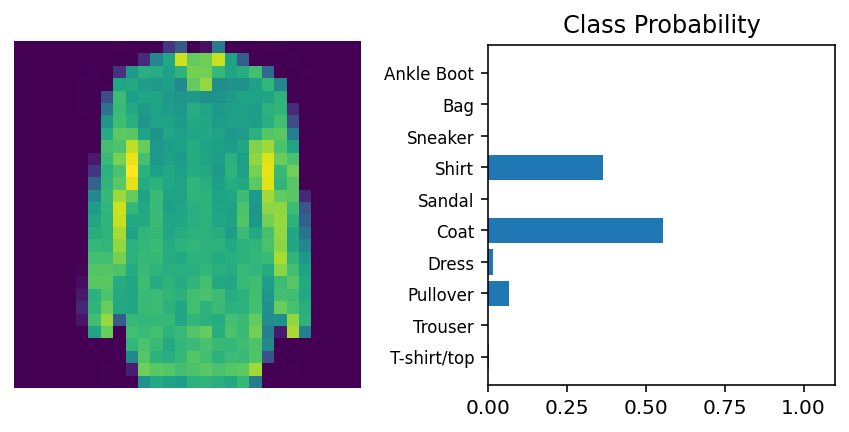

In [20]:
img = images[7]
prob = torch.exp(classifier.forward(img))
helper.view_classify(img, prob, version='Fashion')

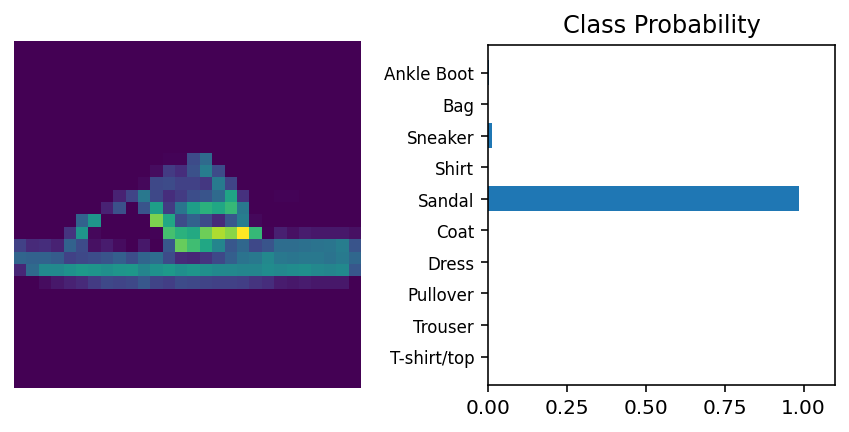

In [21]:
img = images[10]
prob = torch.exp(classifier.forward(img))
helper.view_classify(img, prob, version='Fashion')